In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def f(x):
    return 3*x**2 - 4*x + 5

In [3]:
f(3.0)

20.0

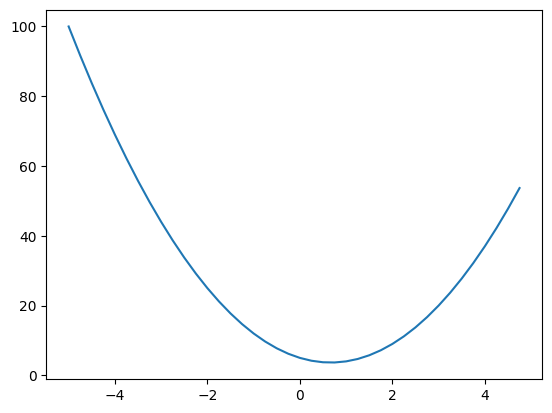

In [4]:
xs = np.arange(-5,5, 0.25)
ys = f(xs)
plt.plot(xs, ys)

In [5]:
h = 0.00000001 # rate of change
x = 2/3
(f(x+h) - f(x))/h

0.0

In [6]:
# less complex case
a = 2.0
b = -3.0
c = 10.0
d = a*b + c
print(d)

4.0


In [7]:
h = 0.0001

# inputs
a = 2.0
b = -3.0
c = 10.0

d1 = a*b + c
a +=h
d2 = a*b + c 

print(f'{d1=}')
print(f'{d2=}')
print('slope for a(da):', (d2 - d1)/h)
print('-'*4)

# inputs
a = 2.0
b = -3.0
c = 10.0

d1 = a*b + c
b +=h
d2 = a*b + c 

print(f'{d1=}')
print(f'{d2=}')
print('slope for b(da):', (d2 - d1)/h)
print('-'*4)

# inputs
a = 2.0
b = -3.0
c = 10.0

d1 = a*b + c
c +=h
d2 = a*b + c 

print(f'{d1=}')
print(f'{d2=}')
print('slope for c(dc):', (d2 - d1)/h)
print('-'*4)

d1=4.0
d2=3.999699999999999
slope for a(da): -3.000000000010772
----
d1=4.0
d2=4.0002
slope for b(da): 2.0000000000042206
----
d1=4.0
d2=4.0001
slope for c(dc): 0.9999999999976694
----


In [ ]:
class Value:

    def __init__(self, data, _children=(), _op='', label=''):
        self.data = data
        self.grad  = 0.0
        self._backward = lambda: None
        self._prev = set(_children) # save previous children
        self._op = _op  # save previous operation
        self.label = label

    # all grad calculations are += because if same variables are used multiple times they are being overwritten
    def __repr__(self):
        return f"Value(data={self.data})"
    
    def __add__(self, other):
        other = other if isinstance(other, Value) else Value(other) #if the other variable is not a Value object we cast into Value
        out = Value(self.data + other.data, (self, other), '+') #append the children and op
    
        def _backward():
            self.grad += 1.0 * out.grad 
            other.grad += 1.0 * out.grad
        out._backward = _backward

        return out
    
    def __sub__(self, other):
        other = other if isinstance(other, Value) else Value(other) #if the other variable is not a Value object we cast into Value
        out =  Value(self.data - other.data, (self, other), '-')
            
        def _backward():
            self.grad += 1.0 * out.grad
            other.grad += 1.0 * out.grad
        out._backward = _backward

        return out
    
    def __mul__(self, other):
        other = other if isinstance(other, Value) else Value(other) #if the other variable is not a Value object we cast into Value
        out = Value(self.data * other.data, (self, other), '*')
            
        def _backward():
            self.grad += other.data * out.grad
            other.grad += self.data * out.grad
        out._backward = _backward

        return out
    
    def __div__(self, other):
        other = other if isinstance(other, Value) else Value(other) #if the other variable is not a Value object we cast into Value
        out = Value(self.data / other.data (self, other))
        
        def _backward():
            self.grad += (1/other.data) * out.grad
            other.grad += (-self.data/other.data**2) * out.grad
        out._backward = _backward

        return out
    
    def tanh(self):
        x = self.data
        t = (math.exp(2*x) - 1)/(math.exp(2*x) + 1)
        out = Value(t, (self, ), 'tanh')
            
        def _backward():
            self.grad += (1 - t**2) * out.grad
        out._backward = _backward

        return out
    
    def backward(self):
        
        topo = []
        visited = set()
        def build_topo(v):
            if v not in visited:
                visited.add(v)
                for child in v._prev:
                    build_topo(child)
                topo.append(v)
        build_topo(self)

        self.grad = 1.0

        for node in reversed(topo):
            node._backward()

In [81]:
a = Value(2.0, label = 'a')
b = Value(-3.0, label = 'b')
c = Value(10.0, label = 'c')
# a+b
# a.__add__(b)
e = a * b; e.label = 'e'
d = e + c; d. label = 'd'
d
f = Value(-2.0, label='f')
L = d * f; L.label = 'L'

In [82]:
d._prev, d._op

({Value(data=-6.0), Value(data=10.0)}, '+')

In [46]:
from graphviz import Digraph

def trace(root):
    # builds a set of all nodes and edges in a graph
    nodes, edges = set(), set()
    def build(v):
        if v not in nodes:
            nodes.add(v)
            for child in v._prev:
                edges.add((child, v))
                build(child)
    build(root)
    return nodes, edges

def draw_dot(root):
    dot = Digraph(format='svg', graph_attr={'rankdir':'LR'}) # LR = left to right

    nodes, edges = trace(root)
    for n in nodes:
        uid = str(id(n))
        # for any value in the graph, create a rectangular ('record') node for it
        dot.node(name = uid, label = "{%s |  data %.4f | grad %.4f }" % (n.label, n.data, n.grad), shape='record')
        if n._op:
            # if this value is a result of some operation, create an op node for it
            dot.node(name = uid + n._op, label = n._op)
            # and connec this node to it
            dot.edge(uid + n._op, uid)
    
    for n1, n2 in edges:
        # connect n1 to the op node of n2
        dot.edge(str(id(n1)), str(id(n2)) + n2._op)
    
    return dot

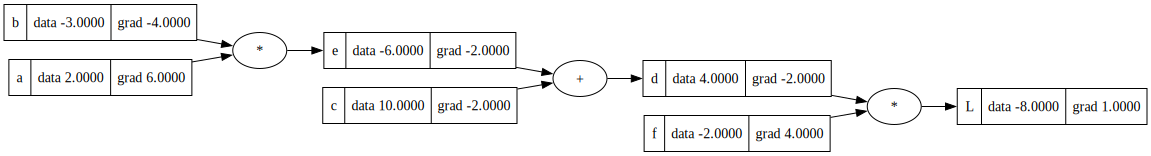

In [76]:
draw_dot(L)

L = d * f
dL/dd = f

(f(x+h) - f(x))/h  
((d+h)*f - d*f)/h  
(d*f + h*f - d*f)/h  
(h*f)/h  
f  

dd / dc ? 1.0

d = c + e

(f(x+h) - f(x))/h  
((c+h +e) - (c + e))/h  
(c + h + e - c - e)/h  
h/h  
1.0  

In [78]:
np.arange(-5,5, 0.2)

array([-5.0000000e+00, -4.8000000e+00, -4.6000000e+00, -4.4000000e+00,
       -4.2000000e+00, -4.0000000e+00, -3.8000000e+00, -3.6000000e+00,
       -3.4000000e+00, -3.2000000e+00, -3.0000000e+00, -2.8000000e+00,
       -2.6000000e+00, -2.4000000e+00, -2.2000000e+00, -2.0000000e+00,
       -1.8000000e+00, -1.6000000e+00, -1.4000000e+00, -1.2000000e+00,
       -1.0000000e+00, -8.0000000e-01, -6.0000000e-01, -4.0000000e-01,
       -2.0000000e-01,  4.4408921e-15,  2.0000000e-01,  4.0000000e-01,
        6.0000000e-01,  8.0000000e-01,  1.0000000e+00,  1.2000000e+00,
        1.4000000e+00,  1.6000000e+00,  1.8000000e+00,  2.0000000e+00,
        2.2000000e+00,  2.4000000e+00,  2.6000000e+00,  2.8000000e+00,
        3.0000000e+00,  3.2000000e+00,  3.4000000e+00,  3.6000000e+00,
        3.8000000e+00,  4.0000000e+00,  4.2000000e+00,  4.4000000e+00,
        4.6000000e+00,  4.8000000e+00])

In [75]:
a.grad = b.data * e.grad
b.grad = a.data * e.grad

In [73]:
c.grad = 1.0 * d.grad # by chain rule of differentiation
e.grad = 1.0 * d.grad

In [63]:
f.grad = d.data
d.grad = f.data

In [59]:
L.grad

1.0

In [68]:
def lol ():

    h = 0.001

    a = Value(2.0, label = 'a')
    b = Value(-3.0, label = 'b') 
    c = Value(10.0, label = 'c')
    e = a * b; e.label = 'e'
    d = e + c; d. label = 'd'
    f = Value(-2.0, label='f')
    L = d * f; L.label = 'L'
    L1 = L.data # since value node we need L.data

    # add +h for the variable to see how that affect the variable L
    a = Value(2.0  , label = 'a')
    b = Value(-3.0, label = 'b')
    c = Value(10.0, label = 'c')
    e = a * b; e.label = 'e'
    d = e + c; d. label = 'd'
    d.data += h
    f = Value(-2.0 , label='f')
    L = d * f; L.label = 'L'
    L2 = L.data 
    
    print((L2 - L1)/h)

lol()

-2.000000000000668


In [153]:
# inputs x1, x2

x1 = Value(2.0, label='x1')
x2 = Value(0.0, label='x2')

# weights w1, w2
w1 = Value(-3.0, label='w1')
w2 = Value(1.0, label='w2')

# bias of the neuron
b = Value(6.8813735870195432, label='b')

x1w1 = x1*w1; x1w1.label = 'x1*w1'
x2w2 = x2*w2; x2w2.label = 'x2*w2'
x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label = 'x1*w1 + x2*w2'
n = x1w1x2w2 + b; n.label = 'n'
o = n.tanh(); o.label='o'


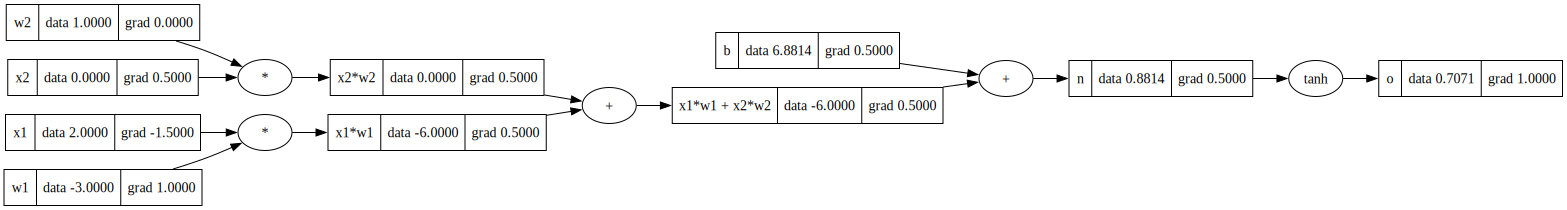

In [156]:
draw_dot(o)

In [155]:
o.backward()

In [144]:
topo = []
visited = set()
def build_topo(v):
    if v not in visited:
        visited.add(v)
        for child in v._prev:
            build_topo(child)
        topo.append(v)
build_topo(o)
topo

[Value(data=2.0),
 Value(data=-3.0),
 Value(data=-6.0),
 Value(data=0.0),
 Value(data=1.0),
 Value(data=0.0),
 Value(data=-6.0),
 Value(data=6.881373587019543),
 Value(data=0.8813735870195432),
 Value(data=0.7071067811865476)]

In [128]:
o.grad = 1
o._backward()

In [132]:
n._backward()

In [135]:
b._backward()

In [138]:
x1w1x2w2._backward()

In [139]:
x1w1._backward()
x2w2._backward()

In [107]:
x1.grad = w1.data * x1w1.grad
w1.grad = x1.data * x1w1.grad
x2.grad = w2.data * x2w2.grad
w2.grad = x2.data * x2w2.grad

In [104]:
x1w1.grad = 0.5
x2w2.grad = 0.5

In [105]:
x1w1x2w2.grad = 0.5
b.grad = 0.5

In [102]:
n.grad = 1 - o.data**2

In [100]:
o.grad = 1.0

In [ ]:
# o = tanh(n)
# do/dn = 1 - o**2

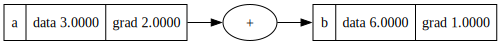

In [159]:
a = Value(3.0, label='a')
b = a + a; b.label = 'b'

b.backward()
draw_dot(b)